In [193]:
# Import the machine learning libraries.
from sklearn.datasets import load_boston
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [194]:
# Load Boston housing dataset.
boston = load_boston()
#X, y = boston.data, boston.target
#print(X.shape, y.shape)

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [195]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math
total_items = len(df.columns)
items_per_row = 3
total_rows = math.ceil(total_items / items_per_row)
fig = make_subplots(rows=total_rows, cols=items_per_row)
cur_row = 1
cur_col = 1
for index, column in enumerate(df.columns):
    fig.add_trace(go.Box(y=df[column], name=column), row=cur_row, col=cur_col)
    
    if cur_col % items_per_row == 0:
        cur_col = 1
        cur_row = cur_row + 1
    else:
        cur_col = cur_col + 1
    
fig.update_layout(height=1000, width=550,  showlegend=False)
fig.show() 

In [196]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math
import numpy as np
total_items = len(df.columns)
items_per_row = 3
total_rows = math.ceil(total_items / items_per_row)
fig = make_subplots(rows=total_rows, cols=items_per_row, subplot_titles=df.columns)
cur_row = 1
cur_col = 1
for index, column in enumerate(df.columns):
    fig.add_trace(go.Scattergl(x=df[column], 
                            y=df['MEDV'], 
                            mode="markers", 
                            marker=dict(size=3)), 
                  row=cur_row, 
                  col=cur_col)
    
    intercept = np.poly1d(np.polyfit(df[column], df['MEDV'], 1))(np.unique(df[column]))
    
    fig.add_trace(go.Scatter(x=np.unique(df[column]), 
                             y=intercept, 
                             line=dict(color='red', width=1)), 
                  row=cur_row, 
                  col=cur_col)
    
    if cur_col % items_per_row == 0:
        cur_col = 1
        cur_row = cur_row + 1
    else:
        cur_col = cur_col + 1
    
fig.update_layout(height=1000, width=550, showlegend=False)
fig.show()

In [197]:
# Split a dataset into X and y.
X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']

In [198]:
# Split data into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print(X_train.shape, X_train.shape, y_test.shape, y_test.shape)

(404, 13) (404, 13) (102, 1) (102, 1)


In [199]:
# Normalization.
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [200]:
# Define the model.
model = Sequential()
#model.add(Conv1D(32, 2, activation="relu", input_shape=(13, 1)))
model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_output (Dense)         (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [201]:
# Fit the model.
%%time
history = model.fit(X_train, y_train, batch_size=12, epochs=200, validation_split=0.05)

Train on 383 samples, validate on 21 samples
Epoch 1/200
383/383 [==============================] - 0s 389us/step - loss: 538.6581 - mae: 21.2016 - val_loss: 339.4178 - val_mae: 17.2926
Epoch 2/200
383/383 [==============================] - 0s 122us/step - loss: 317.3824 - mae: 15.2654 - val_loss: 107.0788 - val_mae: 9.3206
Epoch 3/200
383/383 [==============================] - 0s 124us/step - loss: 92.7605 - mae: 7.4056 - val_loss: 56.6234 - val_mae: 6.3138
Epoch 4/200
383/383 [==============================] - 0s 111us/step - loss: 41.6028 - mae: 4.7456 - val_loss: 30.0895 - val_mae: 4.3517
Epoch 5/200
383/383 [==============================] - 0s 117us/step - loss: 27.0197 - mae: 3.6470 - val_loss: 22.7039 - val_mae: 3.7357
Epoch 6/200
383/383 [==============================] - 0s 121us/step - loss: 22.2205 - mae: 3.3363 - val_loss: 20.7721 - val_mae: 3.5808
Epoch 7/200
383/383 [==============================] - 0s 114us/step - loss: 19.1590 - mae: 3.1316 - val_loss: 18.1754 - val_m

In [202]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=hist.history['loss'], name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_loss'], name='Valid'))
fig.update_layout(height=500, width=700, xaxis_title='Epoch', yaxis_title='Loss')
fig.show()

In [203]:
print(history.history.keys())

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


In [204]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['mae'], name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_mae'], name='Valid'))
fig.update_layout(height=500, width=700, xaxis_title='Epoch', yaxis_title='Mean Absolute Error')
fig.show() 

In [205]:
# Predict the test data with the trained model.
y_pred = model.predict(X_test)

In [206]:
# Evaluate the model.
print(model.evaluate(X_train, y_train))

404/404 [==============================] - 0s 44us/step
[1.8538925812976195, 0.9591245055198669]


In [207]:
# The mean squared error.
print("MSE: %.4f" % mean_squared_error(y_test, y_pred))

MSE: 12.7251


In [208]:
# The coefficient of determination: 1 is perfect prediction.
print('Coefficient of determination: %.4f' % r2_score(y_test, y_pred))

Coefficient of determination: 0.8425


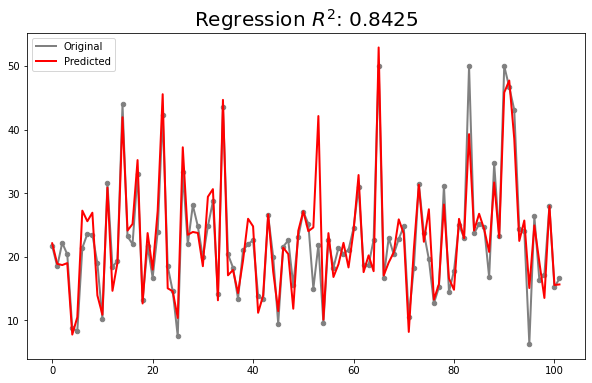

In [209]:
fig = plt.figure(figsize=(10,6))
x_ax = range(len(y_pred))
plt.scatter(x_ax, y_test, s=20, color="gray")
plt.plot(x_ax, y_test, lw=2, color="gray", label="Original")
plt.plot(x_ax, y_pred, lw=2, color="red", label="Predicted")
plt.legend()
plt.title("Regression $R^2$: %.4f" % (r2_score(y_test, y_pred)), fontsize=20)
plt.show()